In [1]:
import cv2


In [2]:
cv2.__version__


'4.5.5'

In [3]:
img = cv2.imread('C:/Users/anupd/Dropbox/My PC (DESKTOP-3NLVKAJ)/Downloads/OIP (2).jpg')

In [4]:
import numpy as np
import cv2

image = np.full((300, 300, 3), 255).astype(np.uint8)

cv2.putText(image, 'some picture', (20, 60),
            cv2.FONT_HERSHEY_SIMPLEX, 1, [0, 0, 0])

cv2.imshow('custom window name', image)
cv2.waitKey(0)

-1

In [4]:
cv2.imshow('custom window name', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
img.shape

(266, 474, 3)

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [8]:
cv2.imshow('webcome',gray)
cv2.waitKey(0)

-1

In [9]:
gray.shape

(266, 474)

In [10]:
type(img[0][0])

numpy.ndarray

In [11]:
len(img)

266

In [12]:
#hue mein convert krte hai #fyadda ye hai ki, separate color hai sbka separate colorhota hai.

hs = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('webcame',img)
cv2.waitKey(0)

-1

In [13]:
hs.shape

(266, 474, 3)

In [14]:
vid = cv2.VideoCapture('C:/Users/anupd/Dropbox/My PC (DESKTOP-3NLVKAJ)/Downloads/pexels-bruchin-noeka-6243293.mp4')

In [15]:
img[0]

array([[35, 17, 40],
       [37, 18, 43],
       [34, 15, 48],
       ...,
       [81, 52,  8],
       [82, 55, 11],
       [82, 55, 11]], dtype=uint8)

In [16]:
cv2.imshow('custom window name', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
reimg=cv2.resize(img,(300,300))
cv2.imshow('custom window name', reimg)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
gray = cv2.cvtColor(reimg,cv2.COLOR_BGR2GRAY)
cv2.imshow('webcame',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
gray = cv2.Canny(img,80,90) #Hit and Trial
cv2.imshow('webcame',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import numpy as np 
kernel= np.ones((1,1))     
erode = cv2.erode(gray,kernel,iterations=1)
cv2.imshow('erode',erode)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
kernel= np.ones((1,1))     
dilate = cv2.dilate(erode,kernel,iterations=1)
cv2.imshow('erode',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [10]:
blank = np.zeros((500,500,3),dtype='int')
#blank

In [11]:
import matplotlib.pyplot as plt

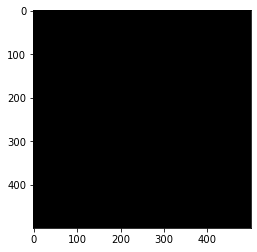

In [12]:
plt.imshow(blank)
plt.show()

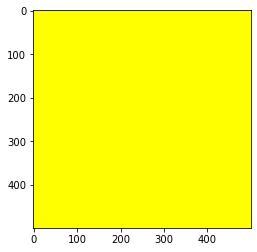

In [25]:
blank[:]=[255,255,0]
plt.imshow(blank)
plt.show()

In [26]:
ig = np.full((3,3,3),255).astype(np.uint8)


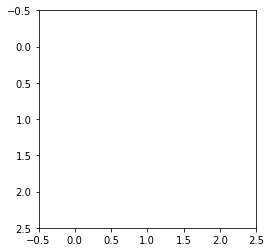

In [27]:
plt.imshow(ig)


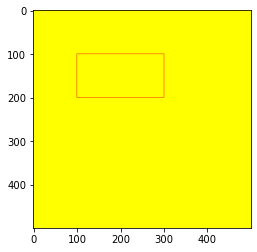

In [28]:
cv2.rectangle(blank,(100,100),(300,200),(255,0,0),1)
plt.imshow(blank)


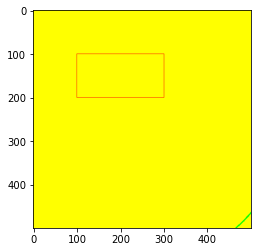

In [29]:
cv2.circle(blank,(200,200),400,(0,255,0),2)
plt.imshow(blank)

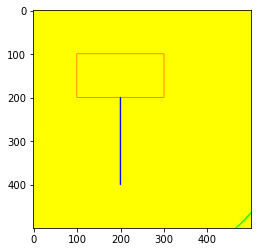

In [30]:
plt.imshow(cv2.line(blank,(200,200),(200,400),(0,0,255),2))


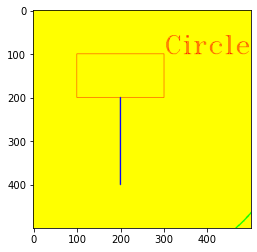

In [31]:
plt.imshow(cv2.putText(blank,"Circle",(300,100),cv2.FONT_HERSHEY_TRIPLEX,2,(255,0,0))
    )

In [3]:
import numpy as np

In [32]:
##Color Detection Project

In [5]:
vid = cv2.VideoCapture(0)
while True:
    _,frame = vid.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    red_L=np.array([90, 50, 70])#hsv
    red_U=np.array([128, 255, 255])#hsv
    redM=cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((1,3))
    redM=cv2.dilate(redM,kernel)
    conts,_=cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts:
        area = cv2.contourArea(cont)
        if area > 100:
            x,y,w,h = cv2.boundingRect(cont)
            cv2.rectangle(hsv,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(hsv,"Blue Color",(x,y),cv2.FONT_HERSHEY_TRIPLEX,2,(0,0,255)) 
    cv2.imshow('VideoCapture',hsv)      
    if cv2.waitKey(1)==ord('q'):
        break;
         
cv2.destroyAllWindows() 

In [6]:
!pip install --user mediapipe

#Face Detection

In [3]:
import mediapipe as mp


In [4]:
mp_face_detection = mp.solutions.face_detection
drawing_details=mp.solutions.drawing_utils

In [6]:
with mp_face_detection.FaceDetection(model_selection=1,min_detection_confidence=0.5) as face_detection:
    #img = cv2.imread('C:/Users/anupd/Dropbox/My PC (DESKTOP-3NLVKAJ)/Downloads/many-faces-2754451.jpg')
    vid = cv2.VideoCapture()
    while True:
        _,frame = vid.read()
        frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        frane=cv2.flip(frame,1)
        result = face_detection.process(frame)
        if result.detections:
            for detect in result.detections:
                drawing_details.draw_detection(frame,detect)
        frame=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)        
        cv2.imshow('custom window name', frame)
        if cv2.waitKey(1)==ord('q'):
             break;       
cv2.destroyAllWindows()            
            
            

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


#FACE MESH

In [6]:
mp_mesh = mp.solutions.face_mesh
drawing_details = mp.solutions.drawing_utils
vid = cv2.VideoCapture()
with mp_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as mesh:
    while 1:
        _,frame = vid.read()
        result = mesh.process(frame)
        if result.multi_face_landmarks:
            for i in result.multi_face_landmarks:
                drawing_details.draw_landmarks(frame,i)
        cv2.imshow("wind2",frame)
        if cv2.waitKey(1) == ord('q'):
            break
cv2.destroyAllWindows()            

AttributeError: 'NoneType' object has no attribute 'shape'

HAND DETECTION

In [12]:
mp_hand = mp.solutions.hands
drawing_details = mp.solutions.drawing_utils
vid = cv2.VideoCapture()
with mp_hand.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hand:
    while 1:
        _,frame = vid.read()
        fr = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        result = hand.process(fr)
        if result.multi_hand_landmarks:
            for i in result.multi_hand_landmarks:
                drawing_details.draw_landmarks(frame,i,mp_hand.HAND_CONNECTIONS)
        cv2.imshow("wind2",frame)
        if cv2.waitKey(1) == ord('q'):
            break
cv2.destroyAllWindows() 

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


HOLISTIC AND POSE

In [8]:
mp_holistic = mp.solutions.holistic
drawing_details = mp.solutions.drawing_utils
vid = cv2.VideoCapture()
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while 1:
        _,frame = vid.read()
        fr = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        result = holistic.process(fr)
        drawing_details.draw_landmarks(frame,result.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
        cv2.imshow("wind2",frame)
        if cv2.waitKey(1) == ord('q'):
            break
cv2.destroyAllWindows() 

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
